In [24]:
import tensorflow as tf
import numpy as np

In [25]:
np.random.seed(101)
tf.set_random_seed(101)

In [26]:
rand_a = np.random.uniform(0,100,(5,5))

In [27]:
rand_b = np.random.uniform(0,100,(5,1))

In [28]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [29]:
add_op = a + b

In [30]:
mult_op = a * b

In [31]:
with tf.Session() as sess:
    
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    print('\n')
    
    mult_result = sess.run(mult_op,feed_dict={a:rand_a,b:rand_b})
    print(mult_result)
    

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


**Example**

In [32]:
n_features = 10
n_dense_neurons = 3

In [33]:
x = tf.placeholder(tf.float32,(None,n_features))

In [34]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

b= tf.Variable(tf.ones([n_dense_neurons]))

In [35]:
xW = tf.matmul(x,W)

In [36]:
z = tf.add(xW,b)

In [37]:
a = tf.sigmoid(z)

In [38]:
init = tf.global_variables_initializer()

In [39]:
with tf.Session() as sess:
    
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [40]:
print(layer_out)

[[0.26712373 0.8228173  0.6628743 ]]


## Simple Regression Example ##

In [41]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [42]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [43]:
y_labes = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [44]:
y_labes

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

In [46]:
import matplotlib.pyplot as plt

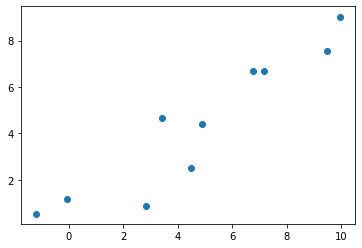

In [50]:
plt.scatter(x_data,y_labes)

In [51]:
np.random.rand(2)

array([0.44236813, 0.87758732])

In [53]:
m = tf.Variable(.44)
b= tf.Variable(.87)

In [54]:
error = 0

for x,y in zip(x_data,y_labes):
    
    y_hat = m*x + b
    
    error += (y-y_hat)**2

In [55]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

W0717 12:33:33.779824 18008 deprecation.py:323] From c:\users\enrique\docume~1\datasc~1\dsenv\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [56]:
init = tf.global_variables_initializer()

In [62]:
with tf.Session() as sess:
    
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

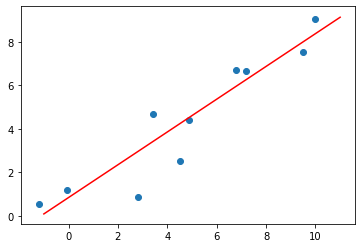

In [63]:
x_test = np.linspace(-1,11,10)

y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.scatter(x_data,y_labes)